<a href="https://colab.research.google.com/github/saribasmetehan/beginner-to-intermediate-ml-projects/blob/main/hr_maas_hesaplama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset'i yüklemek ve gözlemek
data : https://www.kaggle.com/datasets/sazidthe1/data-science-salaries/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('data_science_salaries.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


In [4]:
dataset.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


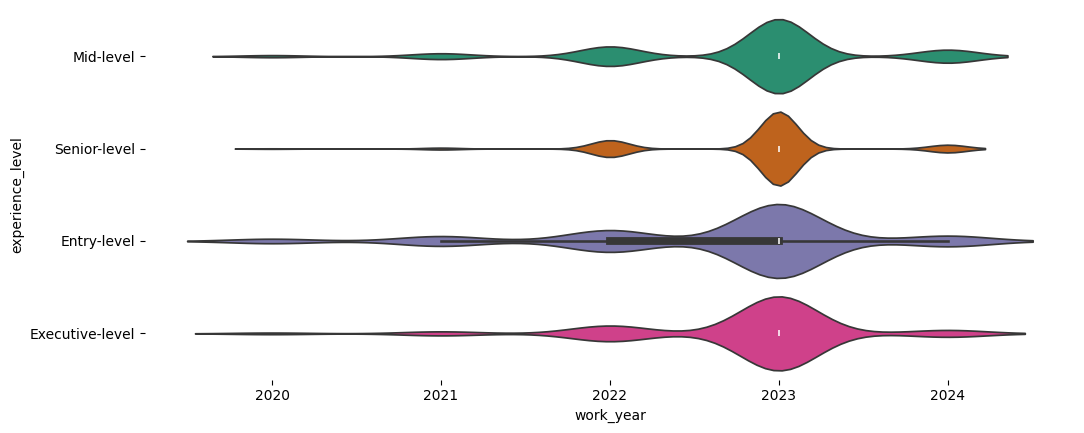

In [5]:
figsize = (12, 1.2 * len(dataset['experience_level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dataset, x='work_year', y='experience_level', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

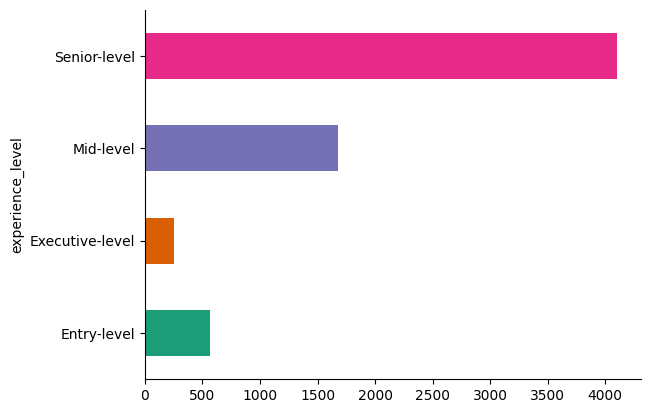

In [6]:
dataset.groupby('experience_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

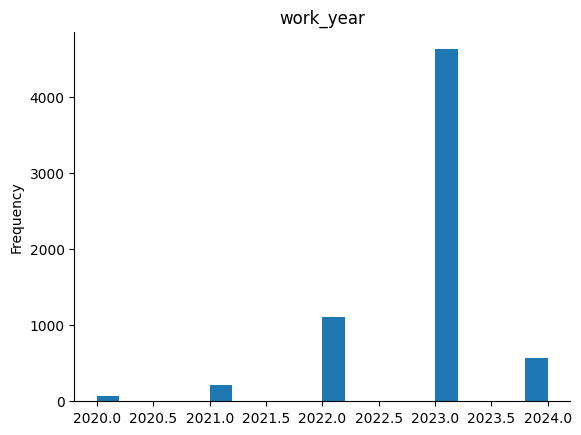

In [7]:
dataset['work_year'].plot(kind='hist', bins=20, title='work_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
dataset.isnull().sum()

,0
job_title,0
experience_level,0
employment_type,0
work_models,0
work_year,0
employee_residence,0
salary,0
salary_currency,0
salary_in_usd,0
company_location,0


# Veri ön işleme
- Label Encoding
- One hot Encoding

In [9]:
x = dataset.drop(['salary_in_usd',"salary_currency","salary"], axis=1)
y = dataset['salary']

In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   company_location    6599 non-null   object
 7   company_size        6599 non-null   object
dtypes: int64(1), object(7)
memory usage: 412.6+ KB


In [11]:
x.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,United States,Medium


In [12]:
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()


x['experience_level'] = label_encoder1.fit_transform(x['experience_level'])
x['employment_type'] = label_encoder2.fit_transform(x['employment_type'])
x['work_models'] = label_encoder3.fit_transform(x['work_models'])
x['company_size'] = label_encoder4.fit_transform(x['company_size'])

In [13]:
dict(zip(label_encoder1.classes_, label_encoder1.transform(label_encoder1.classes_)))

{'Entry-level': 0, 'Executive-level': 1, 'Mid-level': 2, 'Senior-level': 3}

In [14]:
dict(zip(label_encoder2.classes_, label_encoder2.transform(label_encoder2.classes_)))

{'Contract': 0, 'Freelance': 1, 'Full-time': 2, 'Part-time': 3}

In [15]:
dict(zip(label_encoder3.classes_, label_encoder3.transform(label_encoder3.classes_)))

{'Hybrid': 0, 'On-site': 1, 'Remote': 2}

In [16]:
dict(zip(label_encoder4.classes_, label_encoder4.transform(label_encoder4.classes_)))

{'Large': 0, 'Medium': 1, 'Small': 2}

In [17]:
x = pd.get_dummies(x, columns=['job_title', 'company_location', 'employee_residence'], drop_first=True)

# Model eğitimi ve test edilmesi

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

model = xgb_model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8537041544914246